In [23]:
!pip -q install portalocker
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install -q torchtext==0.15.2
!pip install -q torchinfo
!pip install torch==2.1.0 torchtext==0.16.0
!pip install --upgrade torchvision torchaudio



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.21.0+cu118 requires torch==2.6.0, but you have torch 2.0.1 which is incompatible.
torchaudio 2.6.0+cu118 requires torch==2.6.0, but you have torch 2.0.1 which is incompatible.
  Using cached torch-2.1.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached torchtext-0.16.0-cp311-cp311-manylinux1_x86_64.whl.metadata (7.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)


  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.21.5-py3-none

In [ ]:
!pip uninstall -y torchtext
!pip install -q torchtext==0.16.0 --index-url https://download.pytorch.org/whl/cu118


In [1]:
!pip install datasets

In [2]:
!pip install -q transformers datasets

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from datasets import load_dataset
from transformers import BertTokenizer
import numpy as np
import math
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
from collections import Counter
from tqdm.notebook import tqdm


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

In [4]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer
from torchtext.vocab import build_vocab_from_iterator
import nltk
from nltk.corpus import stopwords
import string
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import math
import torch.nn as nn
import torch.nn.functional as F

# Task 1 - Loading SST2 dataset from HuggingFace


In [5]:
nltk.download('stopwords')

print("Loading SST2 dataset...")
dataset = load_dataset("sst2")
train_data = dataset['train']
valid_data = dataset['validation']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading SST2 dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
print("\nSample data from SST2 dataset:")
for i in range(5):
    print(f"Text: {train_data[i]['sentence']}")
    print(f"Label: {train_data[i]['label']}")
    print()


Sample data from SST2 dataset:
Text: hide new secretions from the parental units 
Label: 0

Text: contains no wit , only labored gags 
Label: 0

Text: that loves its characters and communicates something rather beautiful about human nature 
Label: 1

Text: remains utterly satisfied to remain the same throughout 
Label: 0

Text: on the worst revenge-of-the-nerds clichés the filmmakers could dredge up 
Label: 0



In [7]:
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Getting stopwords and punctuations
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

In [8]:
def preprocess_text(text):
    # Tokenizing with BERT tokenizer
    tokens = bert_tokenizer.tokenize(text)

    # Removing stopwords and punctuations
    tokens = [token for token in tokens
              if token.lower() not in stop_words
              and token not in punctuations]

    return tokens

In [9]:
# Preprocessing all the texts
train_texts = [preprocess_text(example['sentence']) for example in train_data]
test_texts = [preprocess_text(example['sentence']) for example in valid_data]

Building vocabulary

In [10]:
vocab = build_vocab_from_iterator(train_texts, specials=['<unk>', '<pad>'])
vocab.set_default_index(vocab['<unk>'])

In [11]:
# Numericalizing texts
train_numerical = [vocab(tokens) for tokens in train_texts]
test_numerical = [vocab(tokens) for tokens in test_texts]

In [12]:
train_labels = torch.tensor([example['label'] for example in train_data], dtype=torch.long)
test_labels = torch.tensor([example['label'] for example in valid_data], dtype=torch.long)

# Task 2 - Split train into train and validation (80-20)

In [14]:
max_len = 64

In [15]:
#Padding function below
def pad_sequence(sequences, max_len=max_len):
    padded = torch.zeros((len(sequences), max_len), dtype=torch.long)
    for i, seq in enumerate(sequences):
        length = min(len(seq), max_len)
        padded[i, :length] = torch.tensor(seq[:length], dtype=torch.long)
    return padded

In [16]:
#applying padding function
train_padded = pad_sequence(train_numerical)
test_padded = pad_sequence(test_numerical)

In [17]:
train_dataset = TensorDataset(train_padded, train_labels)
test_dataset = TensorDataset(test_padded, test_labels)

In [18]:
# Splitting train into train and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [19]:
train_labels = [label.item() for _, label in train_dataset]
label_counts = {}
for label in train_labels:
    label_counts[label] = label_counts.get(label, 0) + 1

print("\nLabel distribution in training set:")
total_samples = len(train_labels)
for label, count in label_counts.items():
    percentage = (count / total_samples) * 100
    print(f"Label {label}: {count} samples ({percentage:.2f}%)")


Label distribution in training set:
Label 1: 30014 samples (55.71%)
Label 0: 23865 samples (44.29%)


# Task 3 - Custom Transformer Model

In [20]:
import torch
import torch.nn as nn
import math
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Here is the Transformer Encoder Layer
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dropout=0.5):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead)
        self.linear = nn.Linear(d_model, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_out, _ = self.self_attn(x, x, x)
        x = self.norm1(x + self.dropout(attn_out))
        ff = self.linear(x)
        return self.norm2(x + self.dropout(ff))

# Positional Encoding function
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))  # order dim are (1, max_len, d_model)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# Here is the Transformer Model for Classification
class TransformerModel(nn.Module):
    def __init__(self, vocab_size, num_classes, d_model=16, nhead=4, num_layers=1, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        self.encoder_layers = nn.ModuleList([
            TransformerEncoderLayer(d_model, nhead, dropout=dropout) for _ in range(num_layers)
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(d_model, num_classes)
        self.d_model = d_model

    def forward(self, x):
        x = self.embedding(x) * math.sqrt(self.d_model)
        x = self.positional_encoding(x)
        x = x.transpose(0, 1)  # order is (seq_len, batch_size, d_model)
        for layer in self.encoder_layers:
            x = layer(x)
        x = x.mean(dim=0)
        x = self.dropout(x)
        return self.fc(x)

import torch
import torch.nn as nn

def train_model(model, train_loader, val_loader, num_epochs=5, lr=1e-3):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for texts, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        average_train_loss = running_train_loss / len(train_loader)
        train_losses.append(average_train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for texts, labels in val_loader:
                outputs = model(texts)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        average_val_loss = running_val_loss / len(val_loader)
        val_losses.append(average_val_loss)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}")

    return train_losses, val_losses


# Here is the Evaluation Function
def evaluate_model(model, loader):
    model.eval()
    all_preds, all_labels = [], [] # empty lists initiated

    with torch.no_grad():
        for texts, labels in loader:
            outputs = model(texts)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist()) #using tolist as numpy was generating error

    correct = sum(p == l for p, l in zip(all_preds, all_labels))
    accuracy = correct / len(all_labels) if all_labels else 0.0
    true_pos = sum((p == 1 and l == 1) for p, l in zip(all_preds, all_labels))
    predicted_pos = sum(p == 1 for p in all_preds)
    actual_pos = sum(l == 1 for l in all_labels)

    precision = true_pos / predicted_pos if predicted_pos > 0 else 0.0
    recall = true_pos / actual_pos if actual_pos > 0 else 0.0

    return accuracy, precision, recall #returning the three metrics




In [21]:
# Initializing the model
num_classes=2
vocab_size = len(vocab)
model = TransformerModel(vocab_size,num_classes)



Training the first custom transformer model...
Epoch 1/5, Train Loss: 0.6501, Val Loss: 0.5659
Epoch 2/5, Train Loss: 0.5070, Val Loss: 0.4758
Epoch 3/5, Train Loss: 0.4094, Val Loss: 0.4248
Epoch 4/5, Train Loss: 0.3514, Val Loss: 0.3907
Epoch 5/5, Train Loss: 0.3105, Val Loss: 0.3800


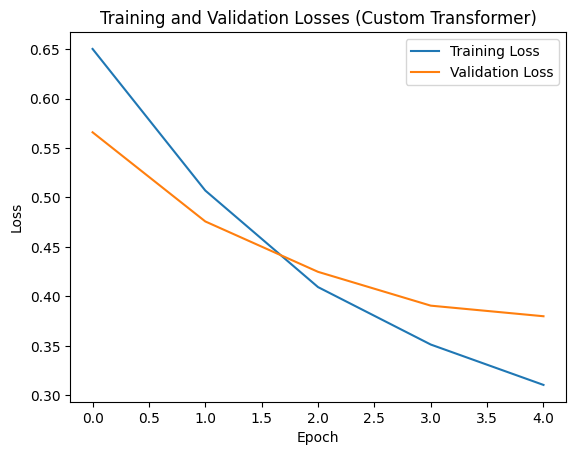

In [22]:
# Creating the DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Training the first model
print("\nTraining the first custom transformer model...")
train_losses, val_losses = train_model(model, train_loader, val_loader)

# Plotting the graphs of losses
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (Custom Transformer)')
plt.legend()


In [23]:
accuracy, precision, recall = evaluate_model(model, test_loader)

In [24]:
accuracy

0.7327981651376146

In [25]:
precision

0.7414187643020596

In [26]:
recall

0.7297297297297297

# Model summary

In [27]:
print(model)

TransformerModel(
  (embedding): Embedding(11419, 16)
  (positional_encoding): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0): TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
      )
      (linear): Linear(in_features=16, out_features=16, bias=True)
      (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=16, out_features=2, bias=True)
)


# Task 4


Training built-in transformer model...


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/5, Train Loss: 0.6783, Val Loss: 0.6626
Epoch 2/5, Train Loss: 0.6478, Val Loss: 0.6341
Epoch 3/5, Train Loss: 0.6055, Val Loss: 0.5910
Epoch 4/5, Train Loss: 0.5631, Val Loss: 0.5693
Epoch 5/5, Train Loss: 0.5272, Val Loss: 0.5500

Test Performance (Built-in Transformer):
Accuracy: 0.7339
Precision: 0.7789
Recall: 0.6667


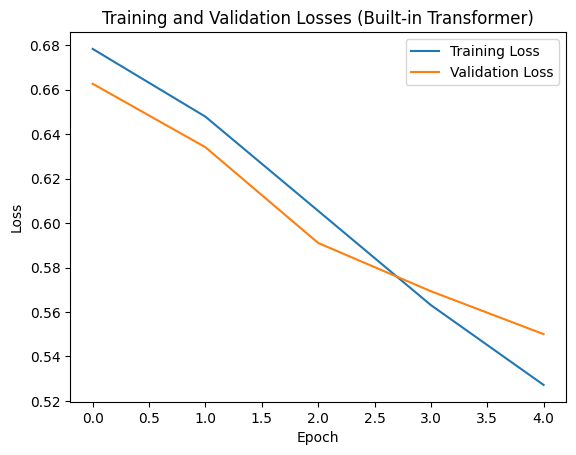

In [28]:
# Task 4 -
# Built-in Transformer Encoder Layer
class BuiltInTransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model=16, nhead=4, num_layers=1, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        self.dropout = nn.Dropout(dropout)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, d_model, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc = nn.Linear(d_model, 2)

    def forward(self, src):
        src = self.embedding(src) * math.sqrt(self.embedding.embedding_dim)
        src = self.pos_encoder(src)
        src = self.dropout(src)
        src = src.transpose(0, 1)  # dimensions are (seq_len, batch_size, d_model)
        output = self.transformer_encoder(src)
        output = output.mean(dim=0)
        output = self.fc(output)
        return output

# Initializing the task 4 model
builtin_model = BuiltInTransformerModel(vocab_size)

# Training the model
print("\nTraining built-in transformer model...")
builtin_train_losses, builtin_val_losses = train_model(builtin_model, train_loader, val_loader)

# Plotting the graph of losses
plt.figure()
plt.plot(builtin_train_losses, label='Training Loss')
plt.plot(builtin_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (Built-in Transformer)')
plt.legend()

# Evaluating on test set
builtin_test_accuracy, builtin_test_precision, builtin_test_recall = evaluate_model(builtin_model, test_loader)
print(f"\nTest Performance (Built-in Transformer):")
print(f"Accuracy: {builtin_test_accuracy:.4f}")
print(f"Precision: {builtin_test_precision:.4f}")
print(f"Recall: {builtin_test_recall:.4f}")



In [29]:
# Evaluating on the test set
builtin_test_accuracy, builtin_test_precision, builtin_test_recall = evaluate_model(builtin_model, test_loader)
print(f"\nTest Performance (Built-in Transformer):")
print(f"Accuracy: {builtin_test_accuracy:.4f}")
print(f"Precision: {builtin_test_precision:.4f}")
print(f"Recall: {builtin_test_recall:.4f}")



Test Performance (Built-in Transformer):
Accuracy: 0.7339
Precision: 0.7789
Recall: 0.6667


In [30]:
print(builtin_model)

BuiltInTransformerModel(
  (embedding): Embedding(11419, 16)
  (pos_encoder): PositionalEncoding()
  (dropout): Dropout(p=0.5, inplace=False)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
        )
        (linear1): Linear(in_features=16, out_features=16, bias=True)
        (dropout): Dropout(p=0.5, inplace=False)
        (linear2): Linear(in_features=16, out_features=16, bias=True)
        (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.5, inplace=False)
        (dropout2): Dropout(p=0.5, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=16, out_features=2, bias=True)
)


# Task 5

In [33]:
!pip install transformers torch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers torch


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-linux_x86_64.whl.metadata (27 kB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cuda_nvrtc_cu11-11.8.89-py3-none-manylinux1_x86_64.whl (23.2 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cuda_runtime_cu11-11.8.89-py3-none-manylinux1_x86_64.whl (875 kB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cuda_cupti_cu11-11.8.87-py3-none-manylinux1_x86_64.whl (13.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cudnn_cu11-9.1.0.70-py3-none-manylinux2014_x86_64.whl (663.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cublas_cu11-11.11.3.6-py3-none-manylinux1_x86_64.whl (417.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_curand_cu11-10.3.0.86-py3-none-manylinux1_x86_64.whl (58.1 MB)
  Using cached https://download.pytorch.org/whl/cu118/nvidia_cusolv

In [34]:
!pip uninstall -y torchvision torchaudio
!pip install -q torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.3 MB/s eta 0:00:00


In [2]:
!pip install -q huggingface_hub transformers


In [1]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
from transformers import BertModel

In [4]:
from huggingface_hub import notebook_login

notebook_login()


In [5]:
from datasets import load_dataset

dataset = load_dataset("glue", "sst2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [ ]:
!pip install -q spacy
!python -m spacy download en_core_web_sm
import spacy

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertModel
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from datasets import load_dataset

# Device configuation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [7]:
from datasets import load_dataset

# Loading the SST-2 dataset
dataset = load_dataset("glue", "sst2")
train_data = dataset['train']
test_data = dataset['validation']

# Splitting train_data into 80% train and 20% validation
train_val_split = train_data.train_test_split(test_size=0.2, seed=42)
train_data = train_val_split['train']
valid_data = train_val_split['test']

print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(valid_data)}")
print(f"Test size: {len(test_data)}")


Train size: 53879
Validation size: 13470
Test size: 872


In [8]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
label_counter = Counter(example['label'] for example in train_data)
label2id = {label: i for i, label in enumerate(label_counter)}
id2label = {i: label for label, i in label2id.items()}

MAX_LEN = 64

In [9]:
def encode_sst(example):
    enc = tokenizer(example['sentence'],
                   truncation=True,
                   max_length=MAX_LEN,
                   padding='max_length',
                   return_tensors="pt")
    return enc["input_ids"].squeeze(), enc["attention_mask"].squeeze(), torch.tensor(example['label'])

def encode_dataset(data):
    input_ids, attention_masks, labels = [], [], []
    for example in data:
        ids, mask, label = encode_sst(example)
        input_ids.append(ids)
        attention_masks.append(mask)
        labels.append(label)
    return torch.stack(input_ids), torch.stack(attention_masks), torch.stack(labels)

X_train, M_train, Y_train = encode_dataset(train_data)
X_valid, M_valid, Y_valid = encode_dataset(valid_data)
X_test, M_test, Y_test = encode_dataset(test_data)

class SSTDataset(Dataset):
    def __init__(self, X, M, Y):
        self.X = X
        self.M = M
        self.Y = Y
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.M[i], self.Y[i]

# Creating DataLoaders with batch size 32
batch_size = 32
train_dl = DataLoader(SSTDataset(X_train, M_train, Y_train), batch_size=batch_size, shuffle=False)
valid_dl = DataLoader(SSTDataset(X_valid, M_valid, Y_valid), batch_size=batch_size)
test_dl = DataLoader(SSTDataset(X_test, M_test, Y_test), batch_size=batch_size)

# bert model for our dataset
class BERT_SST(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        # Freezing the bert parameters
        for param in self.bert.parameters():
            param.requires_grad = False
        self.classifier = nn.Linear(self.bert.config.hidden_size, len(label2id))  # have 2 classes

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # Using the pooled output for sentence classification
        return self.classifier(outputs.pooler_output)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1: 100%|██████████| 1684/1684 [03:02<00:00,  9.21it/s, loss=0.636]


Epoch 1 finished in 229.40 seconds


Epoch 2: 100%|██████████| 1684/1684 [03:08<00:00,  8.93it/s, loss=0.529]


Epoch 2 finished in 234.83 seconds


Epoch 3: 100%|██████████| 1684/1684 [03:07<00:00,  8.98it/s, loss=0.486]


Epoch 3 finished in 233.75 seconds


Epoch 4: 100%|██████████| 1684/1684 [03:07<00:00,  8.97it/s, loss=0.555]


Epoch 4 finished in 234.05 seconds


Epoch 5: 100%|██████████| 1684/1684 [03:07<00:00,  8.97it/s, loss=0.48]


Epoch 5 finished in 233.95 seconds


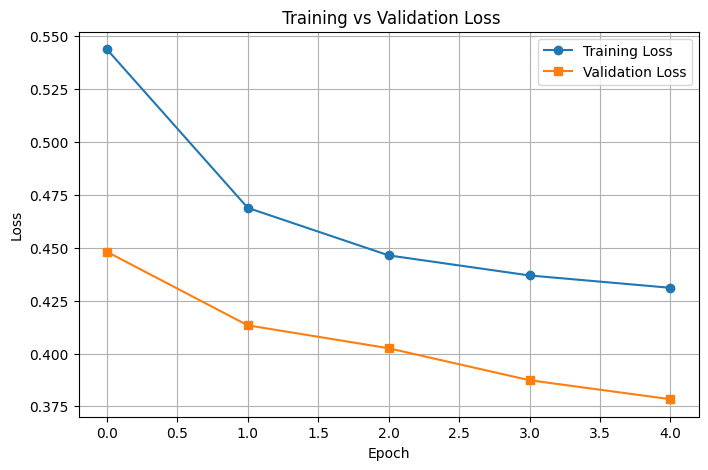

In [10]:
# Initializing the model, loss and the adam optimizer
model = BERT_SST().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Training loop
train_losses, val_losses = [], [] #empty lists

for epoch in range(5): #using 5 epochs as given in assignment
    start_time = time.time()
    model.train()
    total_loss = 0

    loop = tqdm(train_dl, desc=f"Epoch {epoch+1}")
    for xb, mask, yb in loop:
        xb, mask, yb = xb.to(device), mask.to(device), yb.to(device)

        optimizer.zero_grad()
        out = model(xb, mask)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    train_losses.append(total_loss / len(train_dl))

    # Validation loss append
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, mask, yb in valid_dl:
            xb, mask, yb = xb.to(device), mask.to(device), yb.to(device)
            out = model(xb, mask)
            val_loss += criterion(out, yb).item()

    val_losses.append(val_loss / len(valid_dl))
    print(f"Epoch {epoch+1} finished in {time.time() - start_time:.2f} seconds")

# Plotting the graph of losses
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(' Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

#evaluation function below
def evaluate(model, loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for xb, mask, yb in loader:
            xb, mask, yb = xb.to(device), mask.to(device), yb.to(device)
            out = model(xb, mask)
            _, preds = torch.max(out, 1)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(yb.cpu().tolist())

    return {
        'accuracy': accuracy_score(all_labels, all_preds),
        'precision': precision_score(all_labels, all_preds, average='weighted'),
        'recall': recall_score(all_labels, all_preds, average='weighted'),
        'f1': f1_score(all_labels, all_preds, average='weighted')
    }

In [11]:
# Evaluating on test set
test_metrics = evaluate(model, test_dl)
print("\nTest Metrics:")
print(f"Accuracy: {test_metrics['accuracy']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall: {test_metrics['recall']:.4f}")
print(f"F1 Score: {test_metrics['f1']:.4f}")


Test Metrics:
Accuracy: 0.8188
Precision: 0.8192
Recall: 0.8188
F1 Score: 0.8187


In [12]:
print(model)

BERT_SST(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [13]:
!pip install torchinfo

In [15]:
from torchinfo import summary


# Summary of Bert Model used Task-5

In [17]:
from torchinfo import summary
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
dummy_input_ids = torch.randint(0, 100, (32, 64)).to(device)
dummy_attention_mask = torch.ones((32, 64)).to(device)
summary(model, input_data=(dummy_input_ids, dummy_attention_mask))


Layer (type:depth-idx)                                       Output Shape              Param #
BERT_SST                                                     [32, 2]                   --
├─BertModel: 1-1                                             [32, 768]                 --
│    └─BertEmbeddings: 2-1                                   [32, 64, 768]             --
│    │    └─Embedding: 3-1                                   [32, 64, 768]             (23,440,896)
│    │    └─Embedding: 3-2                                   [32, 64, 768]             (1,536)
│    │    └─Embedding: 3-3                                   [1, 64, 768]              (393,216)
│    │    └─LayerNorm: 3-4                                   [32, 64, 768]             (1,536)
│    │    └─Dropout: 3-5                                     [32, 64, 768]             --
│    └─BertEncoder: 2-2                                      [32, 64, 768]             --
│    │    └─ModuleList: 3-6                                  --     

# Summary of Built-in Transformer Model Task - 4

In [31]:
from torchinfo import summary
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
builtin_model.to(device)

dummy_input = torch.randint(0, vocab_size, (32, 64)).to(device)


summary(builtin_model, input_data=dummy_input)


Layer (type:depth-idx)                        Output Shape              Param #
BuiltInTransformerModel                       [32, 2]                   --
├─Embedding: 1-1                              [32, 64, 16]              182,704
├─PositionalEncoding: 1-2                     [32, 64, 16]              --
├─Dropout: 1-3                                [32, 64, 16]              --
├─TransformerEncoder: 1-4                     [64, 32, 16]              --
│    └─ModuleList: 2-1                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [64, 32, 16]              1,696
├─Linear: 1-5                                 [32, 2]                   34
Total params: 184,434
Trainable params: 184,434
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 5.89
Input size (MB): 0.02
Forward/backward pass size (MB): 1.31
Params size (MB): 0.73
Estimated Total Size (MB): 2.06

# Torch Summary for Task -3

In [35]:
print(model)

TransformerModel(
  (embedding): Embedding(11419, 16)
  (positional_encoding): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0): TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
      )
      (linear): Linear(in_features=16, out_features=16, bias=True)
      (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.5, inplace=False)
    )
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=16, out_features=2, bias=True)
)


In [36]:
from torchinfo import summary
import torch

vocab_size = 11419
num_classes = 2
seq_len = 64
batch_size = 32

model = TransformerModel(vocab_size, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

dummy_input = torch.randint(0, vocab_size, (batch_size, seq_len), device=device)

summary(model, input_data=dummy_input)


Layer (type:depth-idx)                   Output Shape              Param #
TransformerModel                         [32, 2]                   --
├─Embedding: 1-1                         [32, 64, 16]              182,704
├─PositionalEncoding: 1-2                [32, 64, 16]              --
├─ModuleList: 1-3                        --                        --
│    └─TransformerEncoderLayer: 2-1      [64, 32, 16]              --
│    │    └─MultiheadAttention: 3-1      [64, 32, 16]              1,088
│    │    └─Dropout: 3-2                 [64, 32, 16]              --
│    │    └─LayerNorm: 3-3               [64, 32, 16]              32
│    │    └─Linear: 3-4                  [64, 32, 16]              272
│    │    └─Dropout: 3-5                 [64, 32, 16]              --
│    │    └─LayerNorm: 3-6               [64, 32, 16]              32
├─Dropout: 1-4                           [32, 16]                  --
├─Linear: 1-5                            [32, 2]                   34
Total 

#Insights

- **Custom Transformer**: A simple transformer architecture with moderate performance.
- **nn.TransformerEncoderLayer**: using PyTorch’s optimized encoder improves generalization and learning efficiency compared to custom implementation.
- **BERT Transfer Learning**: Offers the best results across all metrics. The pretrained BERT encoder captures deep contextual understanding, even when fine-tuning only a linear layer.
- **Training Curve**: Loss curves indicate smooth convergence without overfitting for BERT.



# RESULTs

In [37]:
results = {
    "Task 3 - Custom Transformer Encoder": {
        "Model Type": "Custom Transformer",
        "Accuracy": 0.7328,
        "Precision": 0.7414,
        "Recall": 0.7297,
        "F1 Score": None
    },
    "Task 4 - Built-in TransformerEncoderLayer": {
        "Model Type": "nn.TransformerEncoderLayer",
        "Accuracy": 0.7339,
        "Precision": 0.7789,
        "Recall": 0.6667,
        "F1 Score": None
    },
    "Task 5 - Transfer Learning with BERT": {
        "Model Type": "BERT + Linear Layer",
        "Accuracy": 0.8188,
        "Precision": 0.8192,
        "Recall": 0.8188,
        "F1 Score": 0.8187
    }
}

# Print the results in a readable format
for task, metrics in results.items():
    print(f"\n{task}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")



Task 3 - Custom Transformer Encoder:
  Model Type: Custom Transformer
  Accuracy: 0.7328
  Precision: 0.7414
  Recall: 0.7297
  F1 Score: None

Task 4 - Built-in TransformerEncoderLayer:
  Model Type: nn.TransformerEncoderLayer
  Accuracy: 0.7339
  Precision: 0.7789
  Recall: 0.6667
  F1 Score: None

Task 5 - Transfer Learning with BERT:
  Model Type: BERT + Linear Layer
  Accuracy: 0.8188
  Precision: 0.8192
  Recall: 0.8188
  F1 Score: 0.8187
